# Accident Severity Analysis

### by Aditya Maddali

## Table of contents
* [Introduction](#introduction)
* [Exploratory Data Analysis](#data)
* [Results](#results)
* [Hypothesis Testing](#hypothesis)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

The objective of this exploratory data analysis project is to evaluate the severity and frequency of accidents in the Seattle area based on multiple factors like environment and driver condition. The analysis is based on accident data from 2003 to Dec-2020 provided by Seattle Police Department and Seattle Department of Transportation (SDOT). 
The dataset has 223,304 entries of accidents each with 40 attributes. SDOT also provided the metadata to understand the attributes. These attributes include various accident information such as: environmental conditions, SDOT codes, location, date and time etc.
The results will be of interest to law enforcement, emergency response services and other agencies that are interested in understanding the role of below mentioned factors on accident severity. Armed with this understanding, these agencies can perform two functions:

1.	Mitigate accident severity by reducing the impact and/or probability of contributing factors 
2.	Provide better timely response to accidents by understanding risk prone areas.

The factors that will the severity and frequency of accidents can be broadly classified into two categories:
1. External Factors
External Factors are environmental conditions in which the accident takes place. These are: location, light conditions, road conditions, weather conditions etc.
2. Internal Factors
Internal Factors are a sum total of the state of the driver when the accident took place. That is, if the driver was attentive or if the driver was under the influence of substances etc.


## Exploratory Data Analysis<a name="data"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('Collisions.csv')

In [3]:
print(df.shape)
df.head()

(223304, 40)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.302136,47.558499,1,51600,51600,2059498,Matched,Block,NaN,S FERDINAND ST BETWEEN 24TH AVE S AND 24TH PL S,...,Wet,Daylight,NaN,6148025.0,NaN,32,One parked--one moving,0,0,N
1,-122.360753,47.703668,2,1293,1293,3501623,Matched,Intersection,37108.0,3RD AVE NW AND NW 103RD N ST,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,50,Fixed object,0,0,N
2,-122.318887,47.619922,3,331092,332592,3847739,Matched,Block,NaN,E JOHN ST BETWEEN 10TH AVE E AND 11TH AVE E,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,-122.269598,47.677571,4,336037,337537,EA83214,Unmatched,Block,NaN,NE 68TH ST BETWEEN 54TH AVE NE AND 55TH AVE NE,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,Y
4,-122.396981,47.668634,5,1106,1106,3615276,Unmatched,Block,NaN,NW MARKET ST BETWEEN 30TH AVE NW AND 32ND AVE NW,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223304 entries, 0 to 223303
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                215802 non-null  float64
 1   Y                215802 non-null  float64
 2   OBJECTID         223304 non-null  int64  
 3   INCKEY           223304 non-null  int64  
 4   COLDETKEY        223304 non-null  int64  
 5   REPORTNO         223304 non-null  object 
 6   STATUS           223304 non-null  object 
 7   ADDRTYPE         219570 non-null  object 
 8   INTKEY           72598 non-null   float64
 9   LOCATION         218689 non-null  object 
 10  EXCEPTRSNCODE    102901 non-null  object 
 11  EXCEPTRSNDESC    11865 non-null   object 
 12  SEVERITYCODE     223303 non-null  object 
 13  SEVERITYDESC     223304 non-null  object 
 14  COLLISIONTYPE    196371 non-null  object 
 15  PERSONCOUNT      223304 non-null  int64  
 16  PEDCOUNT         223304 non-null  int6

In [5]:
accdf = df[['X','Y','INCKEY','SEVERITYDESC','COLLISIONTYPE','INJURIES','SERIOUSINJURIES','FATALITIES',
            'UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]            

Dropped irrelevant columns and those with too many blanks

In [6]:
print(accdf.shape)
print(accdf.info())
accdf.head()

(223304, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223304 entries, 0 to 223303
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                215802 non-null  float64
 1   Y                215802 non-null  float64
 2   INCKEY           223304 non-null  int64  
 3   SEVERITYDESC     223304 non-null  object 
 4   COLLISIONTYPE    196371 non-null  object 
 5   INJURIES         223304 non-null  int64  
 6   SERIOUSINJURIES  223304 non-null  int64  
 7   FATALITIES       223304 non-null  int64  
 8   UNDERINFL        196391 non-null  object 
 9   WEATHER          196180 non-null  object 
 10  ROADCOND         196260 non-null  object 
 11  LIGHTCOND        196089 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 20.4+ MB
None


,X,Y,INCKEY,SEVERITYDESC,COLLISIONTYPE,INJURIES,SERIOUSINJURIES,FATALITIES,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,-122.302136,47.558499,51600,Property Damage Only Collision,Parked Car,0,0,0,0,Overcast,Wet,Daylight
1,-122.360753,47.703668,1293,Property Damage Only Collision,Other,0,0,0,N,Overcast,Dry,Dark - Street Lights On
2,-122.318887,47.619922,331092,Property Damage Only Collision,Angles,0,0,0,N,Overcast,Wet,Dark - Street Lights On
3,-122.269598,47.677571,336037,Unknown,NaN,0,0,0,NaN,NaN,NaN,NaN
4,-122.396981,47.668634,1106,Property Damage Only Collision,NaN,0,0,0,NaN,NaN,NaN,NaN


## Analyzing the values in each of the important columns


In [7]:
print(accdf['SEVERITYDESC'].value_counts())
print(accdf['COLLISIONTYPE'].value_counts())
print(accdf['INJURIES'].value_counts())
print(accdf['SERIOUSINJURIES'].value_counts())
print(accdf['FATALITIES'].value_counts())
print(accdf['UNDERINFL'].value_counts())
print(accdf['WEATHER'].value_counts())
print(accdf['ROADCOND'].value_counts())
accdf['LIGHTCOND'].value_counts()

Property Damage Only Collision    138663
Injury Collision                   59233
Unknown                            21910
Serious Injury Collision            3140
Fatality Collision                   358
Name: SEVERITYDESC, dtype: int64
Parked Car    48728
Angles        35837
Rear Ended    34888
Other         24770
Sideswipe     18995
Left Turn     14204
Pedestrian     7717
Cycles         5982
Right Turn     3038
Head On        2212
Name: COLLISIONTYPE, dtype: int64
0     160813
1      47707
2      10764
3       2742
4        825
5        275
6        100
7         40
8         12
9         10
10         6
11         5
13         2
78         1
15         1
12         1
Name: INJURIES, dtype: int64
0     220160
1       2975
2        134
3         23
4          6
5          5
41         1
Name: SERIOUSINJURIES, dtype: int64
0    222946
1       341
2        13
3         2
5         1
4         1
Name: FATALITIES, dtype: int64
N    105099
0     81663
Y      5399
1      4230
Name: UNDERIN

Daylight                    120260
Dark - Street Lights On      50442
Unknown                      13547
Dusk                          6119
Dawn                          2620
Dark - No Street Lights       1583
Dark - Street Lights Off      1240
Other                          245
Dark - Unknown Lighting         33
Name: LIGHTCOND, dtype: int64

### Need to change most of these values to make them analysis friendly

In [8]:
#Seperating out serious injuries as 3 and fatalities as 4
accdf['SEVERITYDESC'] = accdf['SEVERITYDESC'].str.replace(' Collision','')

accdf['UNDERINFL']=accdf['UNDERINFL'].replace(['N','Y','0','1'],[0,1,0,1])

accdf['ROADCOND'] = accdf['ROADCOND'].replace(['Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'],
                                              ['Ice','Wet','Other','Other'])

accdf['LIGHTCOND'] = accdf['LIGHTCOND'].replace(['Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting','Other'],
                                                ['Lowlight','Lowlight','Lowlight','Dark','Dark','Unknown','Unknown'])

accdf['WEATHER'] = accdf['WEATHER'].replace(['Raining','Snowing','Severe Crosswind','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Blowing Snow','Other'],'Inclement')
accdf['WEATHER'] = accdf['WEATHER'].replace(['Partly Cloudy'],'Overcast')

<ipython-input-8-48a66682561b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accdf['SEVERITYDESC'] = accdf['SEVERITYDESC'].str.replace(' Collision','')
<ipython-input-8-48a66682561b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accdf['UNDERINFL']=accdf['UNDERINFL'].replace(['N','Y','0','1'],[0,1,0,1])
<ipython-input-8-48a66682561b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [9]:
print(accdf['SEVERITYDESC'].value_counts())
print(accdf['COLLISIONTYPE'].value_counts())
print(accdf['INJURIES'].value_counts())
print(accdf['SERIOUSINJURIES'].value_counts())
print(accdf['FATALITIES'].value_counts())
print(accdf['UNDERINFL'].value_counts())
print(accdf['WEATHER'].value_counts())
print(accdf['ROADCOND'].value_counts())
accdf['LIGHTCOND'].value_counts()

Property Damage Only    138663
Injury                   59233
Unknown                  21910
Serious Injury            3140
Fatality                   358
Name: SEVERITYDESC, dtype: int64
Parked Car    48728
Angles        35837
Rear Ended    34888
Other         24770
Sideswipe     18995
Left Turn     14204
Pedestrian     7717
Cycles         5982
Right Turn     3038
Head On        2212
Name: COLLISIONTYPE, dtype: int64
0     160813
1      47707
2      10764
3       2742
4        825
5        275
6        100
7         40
8         12
9         10
10         6
11         5
13         2
78         1
15         1
12         1
Name: INJURIES, dtype: int64
0     220160
1       2975
2        134
3         23
4          6
5          5
41         1
Name: SERIOUSINJURIES, dtype: int64
0    222946
1       341
2        13
3         2
5         1
4         1
Name: FATALITIES, dtype: int64
0.0    186762
1.0      9629
Name: UNDERINFL, dtype: int64
Clear        115531
Inclement     36780
Overcast     

Daylight    120260
Lowlight     59181
Unknown      13825
Dark          2823
Name: LIGHTCOND, dtype: int64

## Filtering the dataframe

In [10]:
accdf = accdf[accdf['SEVERITYDESC'] != 'Unknown']
accdf = accdf[accdf['WEATHER'] != 'Unknown']
accdf = accdf[accdf['ROADCOND'] != 'Unknown']
accdf = accdf[accdf['LIGHTCOND'] != 'Unknown']
accdf.dropna(inplace=True)
accdf = accdf.reset_index(drop=True)

#Converting SEVERITYCODE to int64
accdf['UNDERINFL'] = accdf['UNDERINFL'].astype('int64')
print(accdf.shape)
accdf.head()

(172841, 12)


,X,Y,INCKEY,SEVERITYDESC,COLLISIONTYPE,INJURIES,SERIOUSINJURIES,FATALITIES,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,-122.302136,47.558499,51600,Property Damage Only,Parked Car,0,0,0,0,Overcast,Wet,Daylight
1,-122.360753,47.703668,1293,Property Damage Only,Other,0,0,0,0,Overcast,Dry,Lowlight
2,-122.318887,47.619922,331092,Property Damage Only,Angles,0,0,0,0,Overcast,Wet,Lowlight
3,-122.333104,47.607979,1365,Injury,Angles,1,0,0,0,Clear,Dry,Lowlight
4,-122.338904,47.609285,1336,Property Damage Only,Left Turn,0,0,0,0,Clear,Dry,Daylight


In [11]:
accdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172841 entries, 0 to 172840
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                172841 non-null  float64
 1   Y                172841 non-null  float64
 2   INCKEY           172841 non-null  int64  
 3   SEVERITYDESC     172841 non-null  object 
 4   COLLISIONTYPE    172841 non-null  object 
 5   INJURIES         172841 non-null  int64  
 6   SERIOUSINJURIES  172841 non-null  int64  
 7   FATALITIES       172841 non-null  int64  
 8   UNDERINFL        172841 non-null  int64  
 9   WEATHER          172841 non-null  object 
 10  ROADCOND         172841 non-null  object 
 11  LIGHTCOND        172841 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 15.8+ MB


# Results <a name="results"></a>

The results seem very counter-intuitive. The only possible explanation is that the accident frequency and severity seem to be reduced when driving conditions are bad probably because fewer people venture out onto the roads. If this data was normalized for total number of vehicles on the road, we will get a better picture of how these factors affect accidents.

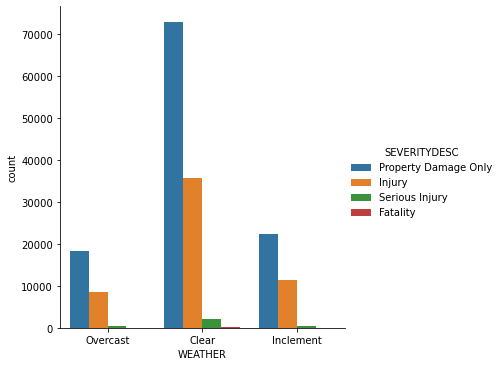

In [12]:
sns.catplot(x="WEATHER", data=accdf,kind="count", hue='SEVERITYDESC',height=5, aspect=1);  

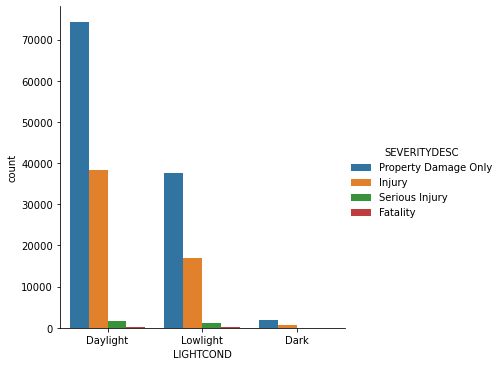

In [14]:
sns.catplot(x="LIGHTCOND", data=accdf,kind="count", hue='SEVERITYDESC',height=5, aspect=1);  


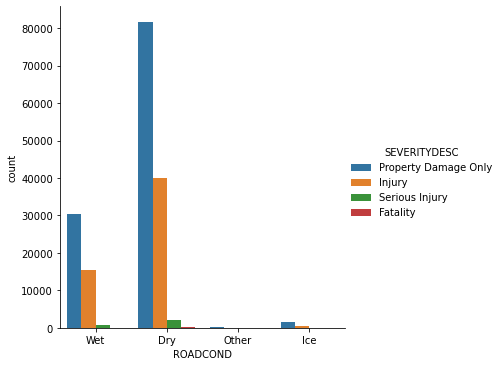

In [15]:
sns.catplot(x="ROADCOND", data=accdf,kind="count", hue='SEVERITYDESC',height=5, aspect=1);              


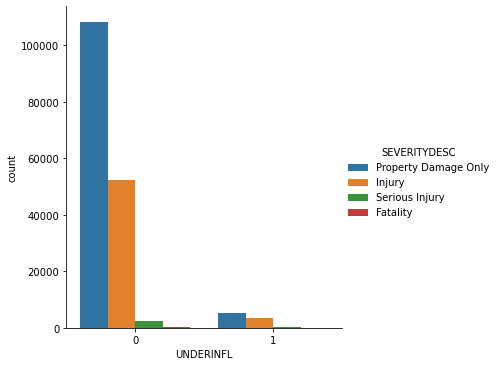

In [16]:
sns.catplot(x="UNDERINFL", data=accdf,kind="count", hue='SEVERITYDESC',height=5, aspect=1);   

# Hypothesis Testing <a name="hypothesis"></a>

1.	Weather: It is intuitive to think that more accidents occur during inclement weather conditions. 

Null Hypothesis: More accidents occur when weather conditions are bad.

2.	Light: It is intuitive to think that more accidents occur when the lighting is poor. 

Null Hypothesis: More accidents occur in bad lighting.

3.	Road: It is intuitive to think that more accidents occur when the road conditions are unfavorable. 

Null Hypothesis: More accidents occur in bad road conditions.

4.	DUI: It is intuitive to think that more accidents occur when the driver is intoxicated. 

Null Hypothesis: More accidents happen when the driver is intoxicated.

From the data below and the graphs it is obvious that we can reject all null hypotheses stated above as the frequency and severity of accidents is far greater when the driving conditions are conducive.


# Conclusion <a name="conclusion"></a>

Quality of the data can be definitely improved by ensuring that the blank fields are filled and that they are filled consistently. The fields that have many missing or unknown values are:
1.	Under the Influence
2.	Inattention
3.	Pedestrian right of way not granted
4.	Speeding


These attributes can help with more analyses.
Also, adding more information about traffic or the total number of cars on the road will aid in data normalization that will give better insights into the effect of poor driving conditions on accidents. 
Further data analysis can be done by following these steps:
1.	Create a metric: Accident Severity Indicator that encapsulates the total damage due to the accident. This metric will include the severity of the accident as defined by SDOT and the number of people involved. Once established, the data will be analyzed for factors that will affect this metric.
2.	For the factors that are categorical variables, one hot encoding can be performed to see if there are any patterns.
